# Analise de Vendas

## 1 - Importações de Biblitecas e Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
Vendas = "Base Vendas.xlsx"
Base_Vendas = pd.read_excel(Vendas)
Base_Vendas.shape

(9998, 8)

In [3]:
Base_Vendas.head()

,SKU,Preco,Produto,Marca,Quantidade Vendida,Data da Venda,Loja,Endereco
0,HL1005,1500,Câmera Digital Rebel T6 - Preto,Canon,3,2018-01-01,Niterói,"Rua Quinze de Novembro, 8 - Loja 301a Loja 301..."
1,HL1006,1400,TV LED 32' - Preto,Samsung,4,2018-01-01,Porto Alegre,"Av. Borges de Medeiros, 3120 - Praia de Belas,..."
2,HL1019,6500,iPhone XS - Preto,Apple,5,2018-01-01,Salvador,"Shopping Barra - Av. Centenário, 2992 - Barra,..."
3,HL1024,2400,Aspire 5 - Cinza,Acer,2,2018-01-01,Guarulhos,"R. Luíz Faccini, 212 - Centro, Guarulhos - SP,..."
4,HL1012,5500,Dell G7 - Vermelho,Dell,1,2018-01-01,Rio de Janeiro,"R. Visc. de Pirajá, 136 - Ipanema, Rio de Jane..."


## 2 - Tratamento de Dados

In [6]:
Base_Vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SKU                 9998 non-null   object        
 1   Preco               9998 non-null   int64         
 2   Produto             9998 non-null   object        
 3   Marca               9998 non-null   object        
 4   Quantidade Vendida  9998 non-null   int64         
 5   Data da Venda       9998 non-null   datetime64[ns]
 6   Loja                9998 non-null   object        
 7   Endereco            9998 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 625.0+ KB


### Convertendo Preço para float

In [13]:
Base_Vendas['Preco'] = Base_Vendas['Preco'].astype(float)
Base_Vendas['Preco'].head()

0    1500.0
1    1400.0
2    6500.0
3    2400.0
4    5500.0
Name: Preco, dtype: float64

### Removendo coluna Endereço que não será utilizada

In [15]:
Base_Vendas.drop(['Endereco'], axis=1)

,SKU,Preco,Produto,Marca,Quantidade Vendida,Data da Venda,Loja
0,HL1005,1500.0,Câmera Digital Rebel T6 - Preto,Canon,3,2018-01-01,Niterói
1,HL1006,1400.0,TV LED 32' - Preto,Samsung,4,2018-01-01,Porto Alegre
2,HL1019,6500.0,iPhone XS - Preto,Apple,5,2018-01-01,Salvador
3,HL1024,2400.0,Aspire 5 - Cinza,Acer,2,2018-01-01,Guarulhos
4,HL1012,5500.0,Dell G7 - Vermelho,Dell,1,2018-01-01,Rio de Janeiro
...,...,...,...,...,...,...,...
9993,HL1001,2600.0,Smart TV 50' 4K - Preto,LG,2,2018-12-31,Recife
9994,HL1015,700.0,Câmera Digital Sony Cyber - Azul,Sony,1,2018-12-31,São Paulo
9995,HL1013,1550.0,Câmera Coolpix L340 - Cinza,Nikon,3,2018-12-31,Guarulhos
9996,HL1019,6500.0,iPhone XS - Preto,Apple,1,2018-12-31,Recife


### Verificando campos Nulos e campos Unicos

In [17]:
Base_Vendas.isnull().sum()

SKU                   0
Preco                 0
Produto               0
Marca                 0
Quantidade Vendida    0
Data da Venda         0
Loja                  0
Endereco              0
dtype: int64

In [18]:
Base_Vendas.nunique()

SKU                    24
Preco                  20
Produto                24
Marca                  11
Quantidade Vendida      5
Data da Venda         365
Loja                   13
Endereco               13
dtype: int64

## 3 - Analises

## Produtos com maior Faturamento

In [75]:
Base_Vendas['Faturamento'] = Base_Vendas['Preco'] * Base_Vendas['Quantidade Vendida']
Analise_Faturamento = Base_Vendas.groupby(by=['Produto']).sum()['Faturamento'].reset_index().sort_values(by="Faturamento", ascending=False)
Analise_Faturamento

,Produto,Faturamento
13,Smart TV 50' 4K - Preto,8561800
23,iPhone XS - Preto,8092500
8,Galaxy S8 - Verde,4740000
5,Dell G7 - Vermelho,4647500
9,Inspiron 15 - Prata,4475800
3,Câmera Digital Rebel T6 - Preto,3939000
15,Smart TV LED Full HD 55' - Preto,3806000
7,Galaxy S10 - Cinza,3649500
1,Aspire 5 - Cinza,3259200
10,Moto G7 - Vermelho,2969400


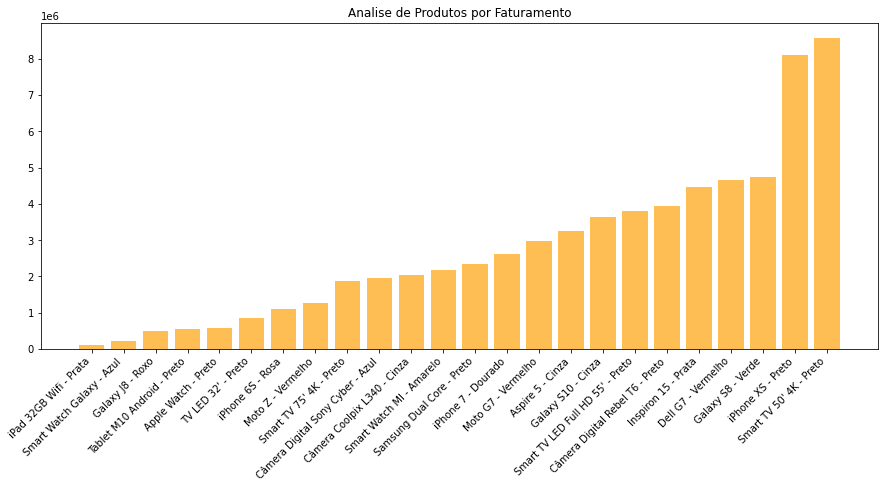

In [154]:
plt.figure(figsize=(15,6))
plt.title("Analise de Produtos por Faturamento")
plt.bar(Analise_Faturamento['Produto'], Analise_Faturamento['Faturamento'], color="#FEBE53");
plt.xticks(rotation=45, ha="right");
plt.gca().invert_xaxis()

## Produtos mais Vendidos

In [76]:
Analise_Produto = Base_Vendas['Produto'].value_counts()
Analise_Produto

Smart TV 50' 4K - Preto             1084
Câmera Digital Sony Cyber - Azul     923
Câmera Digital Rebel T6 - Preto      867
Moto G7 - Vermelho                   705
Inspiron 15 - Prata                  662
Smart TV LED Full HD 55' - Preto     625
Smart Watch MI - Amarelo             610
Samsung Dual Core - Preto            541
Galaxy S8 - Verde                    531
Aspire 5 - Cinza                     459
Câmera Coolpix L340 - Cinza          444
iPhone XS - Preto                    410
iPhone 7 - Dourado                   338
Dell G7 - Vermelho                   288
Moto Z - Vermelho                    275
Galaxy S10 - Cinza                   270
TV LED 32' - Preto                   207
iPhone 6S - Rosa                     188
Galaxy J8 - Roxo                     150
Apple Watch - Preto                  112
Smart TV 75' 4K - Preto              111
Tablet M10 Android - Preto            95
Smart Watch Galaxy - Azul             52
iPad 32GB Wifi - Prata                51
Name: Produto, d

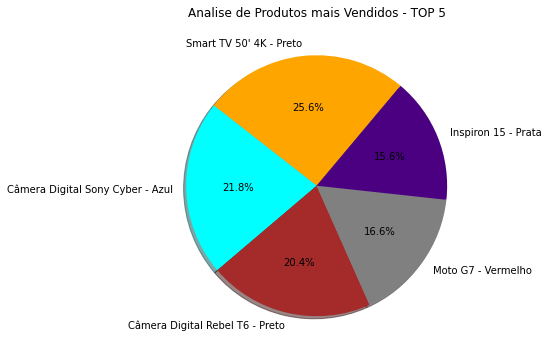

In [51]:
plt.figure(figsize=(15,6), facecolor='white')
plt.title("Analise de Produtos mais Vendidos - TOP 5")
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")
plt.pie(
    Analise_Produto.head(5),
    colors=colors,
    labels= Analise_Produto.index[0:5],
    shadow=True,
    startangle=50,
    autopct='%1.1f%%'
);

## Faturamento e QTD Vendida por Estado

In [108]:
Analise_Estados = Base_Vendas.groupby(by=['Loja'])[['Faturamento', 'Quantidade Vendida']].sum().reset_index().sort_values(by="Faturamento", ascending=False)
Analise_Estados

,Loja,Faturamento,Quantidade Vendida
12,São Paulo,15418400,6832
10,Rio de Janeiro,7591600,3459
11,Salvador,6607300,2918
3,Fortaleza,6411100,2896
9,Recife,6293850,2925
0,Belo Horizonte,4492700,2037
2,Curitiba,4032500,1900
5,Guarulhos,3512250,1531
8,Porto Alegre,3368600,1598
4,Goiânia,3084550,1371


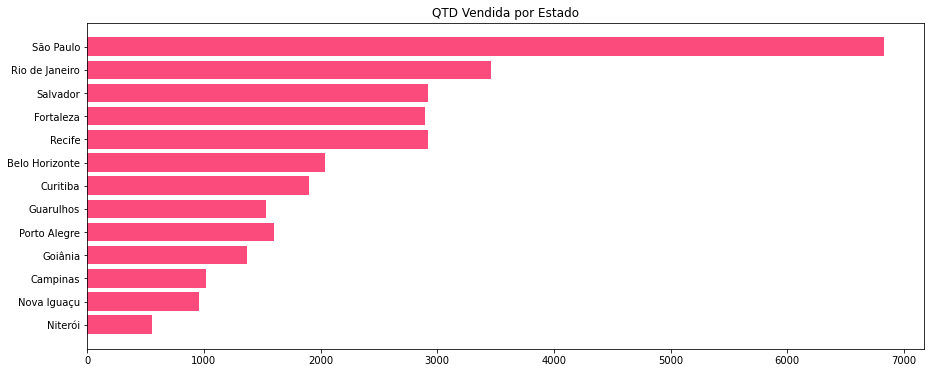

In [153]:
plt.figure(figsize=(15,6))
plt.title("QTD Vendida por Estado")
plt.barh(Analise_Estados['Loja'], Analise_Estados['Quantidade Vendida'], color="#FB4B7C");
plt.gca().invert_yaxis()

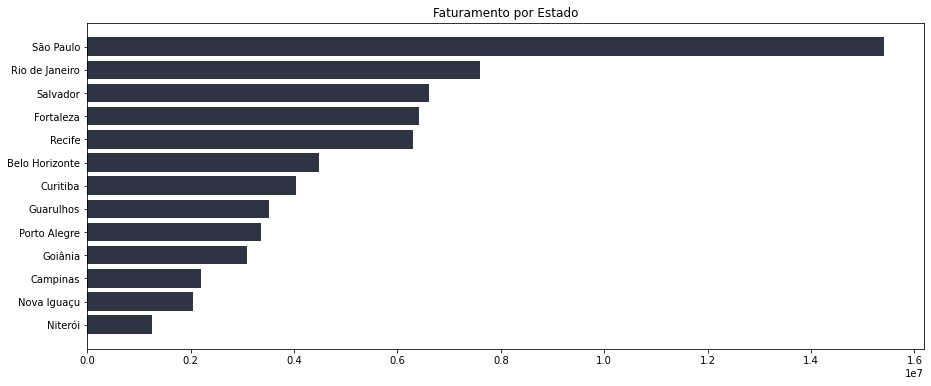

In [152]:
plt.figure(figsize=(15,6))
plt.title("Faturamento por Estado")
plt.barh(Analise_Estados_Fat['Loja'], Analise_Estados_Fat['Faturamento'], color="#2E3442");
plt.gca().invert_yaxis()

## Faturamento e QTD Vendida por Marca

In [101]:
Analise_Fat_Marca = Base_Vendas.groupby(by=['Marca'])[['Faturamento', 'Quantidade Vendida']].sum().reset_index().sort_values(by="Faturamento", ascending=False)
Analise_Fat_Marca

,Marca,Faturamento,Quantidade Vendida
8,Samsung,14724650,5803
1,Apple,12493950,3343
3,Dell,9123300,2791
4,LG,8561800,3293
5,Motorola,4238400,2967
2,Canon,3939000,2626
7,Philco,3806000,1903
0,Acer,3259200,1358
10,Xiaomi,2175600,1813
6,Nikon,2046000,1320


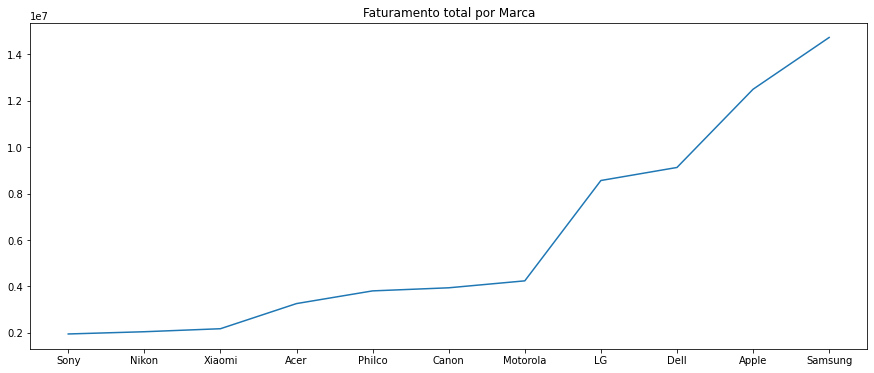

In [122]:
plt.figure(figsize=(15,6))
plt.title("Faturamento total por Marca")
plt.plot(Analise_Fat_Marca['Marca'], Analise_Fat_Marca['Faturamento']);
plt.gca().invert_xaxis()

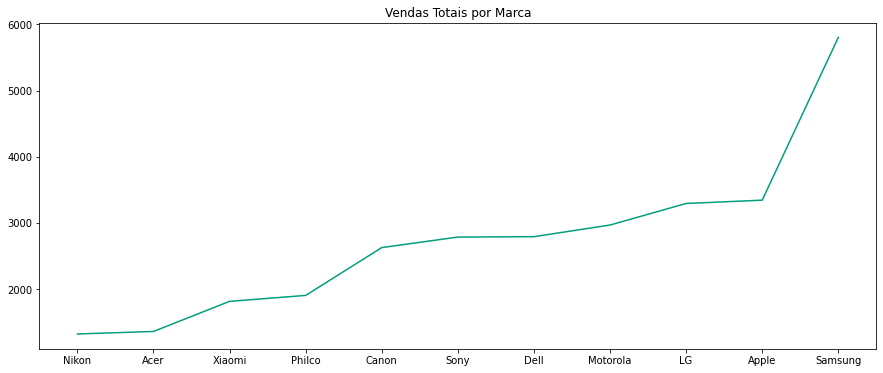

In [151]:
plt.figure(figsize=(15,6))
plt.title("Vendas Totais por Marca")
plt.plot(Analise_QTV_Marca['Marca'], Analise_QTV_Marca['Quantidade Vendida'], color="#009E7C");
plt.gca().invert_xaxis()

## Ticket Médio

In [185]:
Analise_Estados['Ticket Medio'] = round(Analise_Estados['Faturamento']/Analise_Estados['Quantidade Vendida'], 2)
Ticket_Medio = Analise_Estados[['Loja', 'Ticket Medio']].sort_values(by="Ticket Medio", ascending=False)
Ticket_Medio

,Loja,Ticket Medio
5,Guarulhos,2294.09
11,Salvador,2264.32
12,São Paulo,2256.79
4,Goiânia,2249.85
6,Niterói,2237.75
3,Fortaleza,2213.78
0,Belo Horizonte,2205.55
10,Rio de Janeiro,2194.74
1,Campinas,2155.34
9,Recife,2151.74


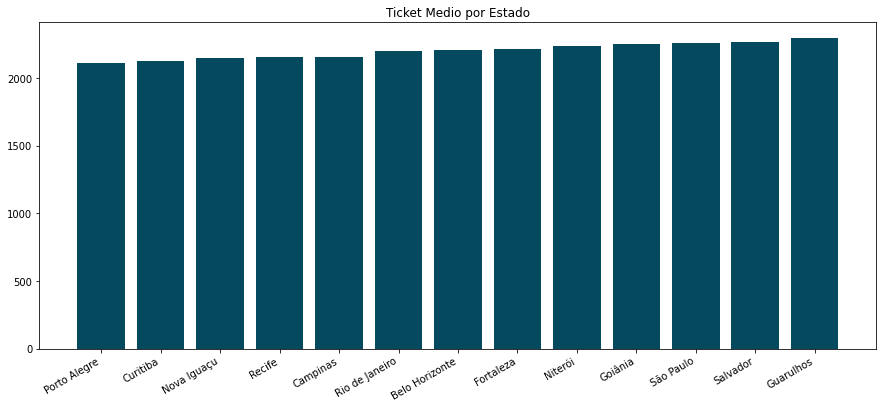

In [188]:
plt.figure(figsize=(15,6))
plt.title("Ticket Medio por Estado")
plt.bar(Ticket_Medio['Loja'], Ticket_Medio['Ticket Medio'], color='#05495F')
plt.xticks(rotation=30, ha="right");
plt.gca().invert_xaxis()